<a href="https://colab.research.google.com/github/Esther-EA/SGA_Assignments/blob/master/project_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Pandas_INTRO

/content/drive/MyDrive/Pandas_INTRO


In [3]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Pandas_INTRO/house_pricing_dataset.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**The distribution of house prices**

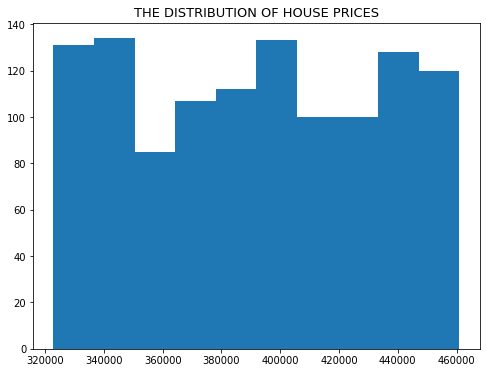

In [12]:
plt.figure(figsize=(8,6))
df_titles = df[["date","price", "city", "bedrooms", "yr_built", "yr_renovated","sqft_basement"]]
plt.hist(x="price", range=(322875.0, 460943.5), data=df_titles)
plt.title("THE DISTRIBUTION OF HOUSE PRICES", fontdict={"fontsize":13});

**The distribution of average house prices across the top 10 cities**

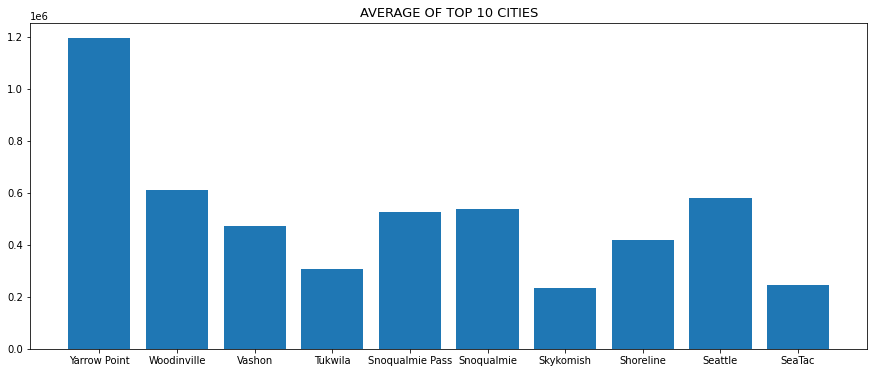

In [20]:
cities = df_titles.groupby(by="city").price.mean()
cities_reset = cities.reset_index()
top_cities =cities_reset.sort_values("city", ascending=False)
top_cities2 = top_cities.head(10)
top_cities2

plt.figure(figsize=(15,6))
plt.bar(top_cities2["city"], top_cities2["price"])
plt.title("AVERAGE OF TOP 10 CITIES", fontdict={"fontsize":13})

plt.show()

**The trend of house prices from the earliest date to the latest date in the dataset**

<ipython-input-22-d91c1f87504d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_date["date"] = house_date["date"].apply(pd.to_datetime)


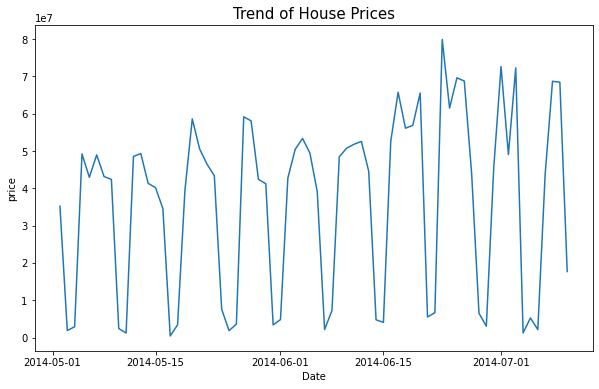

In [22]:
# show the needed columns
house_date = df_titles[["date", "price"]]

# convert the date column to a datetime object
house_date["date"] = house_date["date"].apply(pd.to_datetime)

# group the date by price
price_sum = house_date.groupby(by="date", as_index=False)["price"].sum()
plt.figure(figsize=(10,6))
plt.plot(price_sum["date"], price_sum["price"])
plt.xlabel("Date")
plt.ylabel("price")
plt.title("Trend of House Prices", fontdict={"fontsize":15})
plt.show()

**The distribution of maximum bedroom size across the top 10 cities**

Text(0.5, 1.0, 'MAXIMUM BEDROOM SIZE  ACROSS THE TOP 10 CITIES')

<Figure size 864x504 with 0 Axes>

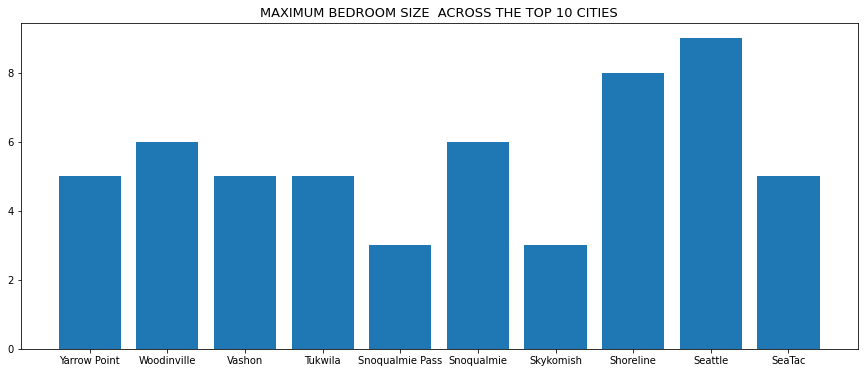

In [26]:
plt.figure(figsize=(12,7))
cities = df_titles.groupby(by="city").bedrooms.max()
cities_reset = cities.reset_index()
cities_reset


top_cities =cities_reset.sort_values("city", ascending=False)
top_cities3 = top_cities.head(10)
top_cities3

plt.figure(figsize=(15,6))
plt.bar(top_cities3["city"], top_cities3["bedrooms"])
plt.title("maximum bedroom size  across the top 10 cities".upper(), fontdict={"fontsize":13})


**The distribution of oldest houses across top 10 cities**

Text(0.5, 1.0, 'OLDEST HOUSES ACROSS TOP 10 CITIES')

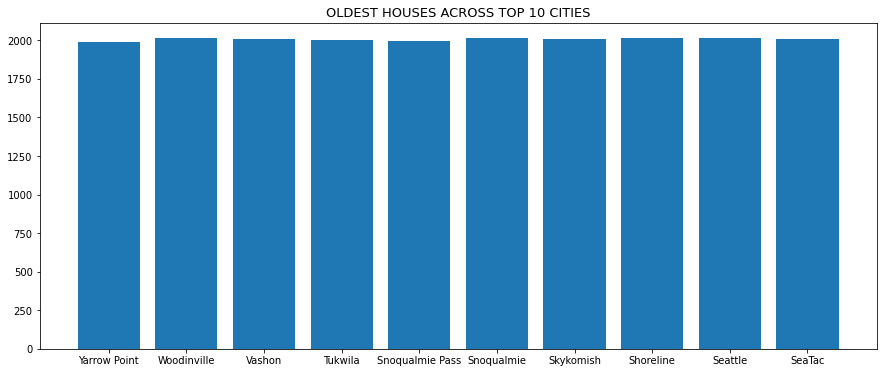

In [30]:
cities = df_titles.groupby(by="city").yr_built.max()
cities_reset = cities.reset_index()
cities_reset

top_cities =cities_reset.sort_values("city", ascending=False)
top_cities4 = top_cities.head(10)
top_cities4

plt.figure(figsize=(15,6))
plt.bar(top_cities4["city"], top_cities4["yr_built"])
plt.title("oldest houses across top 10 cities".upper(), fontdict={"fontsize":13})


**The distribution of the years the houses were last renovated**

Text(0.5, 1.0, 'DISTRIBUTION OF YEARS HOUSES WERE LAST RENOVATED')

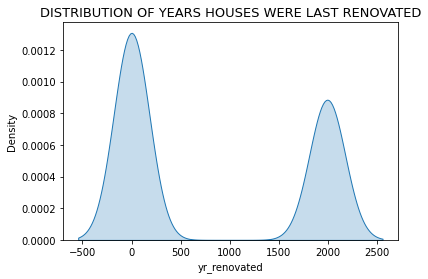

In [32]:
sns.kdeplot(x=df_titles["yr_renovated"], data = df_titles, shade=True)
plt.title("Distribution of years Houses were Last Renovated".upper(), fontdict={"fontsize":13})

**The distribution of average basement square feets across top 10 cities**

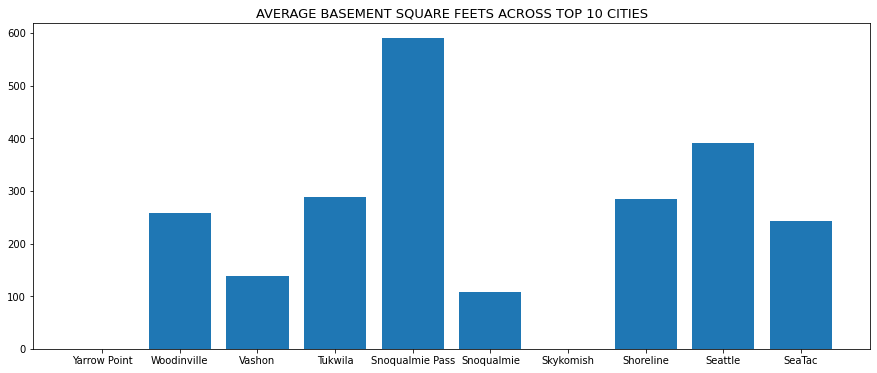

In [34]:
cities = df_titles.groupby(by="city").sqft_basement.mean()
cities_reset = cities.reset_index()
cities_reset

top_cities =cities_reset.sort_values("city", ascending=False)
top_cities5 = top_cities.head(10)
top_cities5

plt.figure(figsize=(15,6))
plt.bar(top_cities5["city"], top_cities5["sqft_basement"])
plt.title("Average basement square feets across top 10 cities".upper(), fontdict={"fontsize":13});

**The relationship between prices and number of bedrooms**

Text(0.5, 1.0, 'PRICES AND NUMBERS OF BEDROOMS')

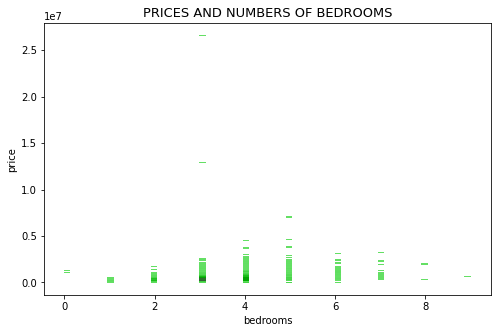

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(x=df_titles["bedrooms"], y=df_titles["price"], data=df_titles, color="green");
plt.title("prices and numbers of bedrooms".upper(), fontdict={"fontsize":13})